# 1, Overview

The goal of this project was to perform k-means clustering on MNIST traning data set. Clustering is a type of unsupervised machine learning that identify representitives with given labels. The functions takes a list of N data vectors to be clustered, and the number of clusters K as input, and outputs a list of N group assignment indices (c1, c2, ... , cN), a list of K group representative vectors (z1, ... , zK) and the value of J clust after each iteration of the algorithm until termination. To get a smaller J_clust, the experiment was performed several times (P) for each K. To minimize running time, each pairs of P, K was calculated in separete notebook. The functions of each notebook are the same and are only explained in K=20, P=30.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import loadmat
import math

In [ ]:
X = loadmat("mnist.mat")
data_train = X['trainX'] # Training set digits 


# 2, Design k-means clustering

In [ ]:
def initiation(K,data):
    
    # number of elements in each class
    n = int(len(data)/K)
    
    # create array that represents each elements belongs to which class
    cluster_num = np.repeat(np.arange(K),n)
    np.random.shuffle(cluster_num)
    return cluster_num

The initialization function assigns each element in data to a random class. It randomly selecting each ci
to be an integer between 0 and K-1.

In [ ]:
def get_label(cluster_num,K,data):
    label = np.zeros((K,len(data[0])))
    for i in range(K):
        
        # calculate the mean for each class
        cluster = data[np.where(cluster_num==i)]
        label[i,:] = np.mean(cluster,axis = 0)
    return label # return a list of representitives

In [ ]:
def new_cluster(K,label,data):
    
    # generate new [c1,...ci] based on smallest distance
    data_norms = np.zeros((len(data),K)) 
    
    # distance for all the elements in data to representitive of each class
    for i in range(K):
        dists = np.linalg.norm(data-label[i], axis = 1)
        data_norms[:,i] = dists

    # get the new ci that returns the smallest distance for each element   
    new_cluster_num = np.argmin(data_norms, axis = 1)
    
    return new_cluster_num

In [ ]:
def k_mean(K,data):
    
    # Initiation
    cluster_num = initiation(K,data)
    label = get_label(cluster_num,K,data)
    count = 0
    J_clust = []
    
    # update ci and representitives after each run
    while count<25: # Terminate after 25 runs
        cluster_num = new_cluster(K,label,data)
        label = get_label(cluster_num,K,data)
        count += 1
        
        print('%d th iteration' % count) # (optional) to keep track of running time
        
        # calculation of J_clust
        means = np.linalg.norm(data-label[cluster_num])
        J = np.sum(means)

        J = J/len(data)
        J_clust.append(J)
    return cluster_num, label, J_clust

Termination happens after 25 runs of updating ci and representives. After 20-30 runs, the J_clust will not change much upon each updating. Thus, to save running time, ci and representitives will only update for 25 times then terminates.

In [ ]:
def k_mean_Pruns(K,data,P):
    J_clust_all = np.zeros((P,25))
    label_all = np.zeros((P,K,len(data[0])))
    cluster_all = np.zeros((P,len(data)))
    for i in range(P):
        cluster_num, label, J_clust = k_mean(K,data)
        J_clust_all[i,:] = J_clust
        label_all[i,:,:] = label
        cluster_all[i,:] = cluster_num
        
    # store all J_clust, representitives and indices for the P repeating times.
    min_J_i = np.argmin(J_clust_all[:,-1])
    max_J_i = np.argmax(J_clust_all[:,-1])
    
    # find the max and min J_clust and their corresponding zk and ci.
    min_J = J_clust_all[min_J_i]
    max_J = J_clust_all[max_J_i]
    min_label = label_all[min_J_i]
    max_label = label_all[max_J_i]
    min_cluster = cluster_all[min_J_i]
    max_cluster = cluster_all[max_J_i]
    return min_J, min_label, min_cluster, max_J, max_label, max_cluster

Above is a function that takes number of class K, number of repeating times P, and data as input. It outputs the minimum and maximum ending J_clust among all P times, and the corresponding representitives(zk) and indices(ci).

# 3, Experiment K=20, P=30

In [ ]:
min_J, min_label, min_cluster, max_J, max_label, max_cluster = k_mean_Pruns(20,data_train,30)

## 3.1 Plotting J_clust

Text(0, 0.5, 'J_clust')

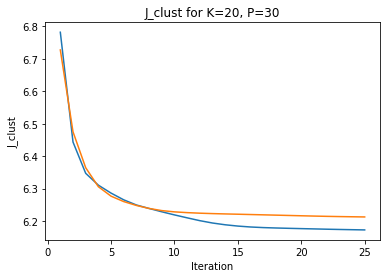

In [ ]:
x = np.arange(25)+1
plt.plot(x, min_J)
plt.plot(x, max_J)
plt.title('J_clust for K=20, P=30')
plt.xlabel('Iteration')
plt.ylabel('J_clust')

The minimum(blue) and maximum(orange) J_clust shows similar curve. They both drop very quickly before the first 5 iteration and starts to flatten out at about 10 iterations. This suggests that the clustering is successful. Before 5 iterations, the two curves overlap a lot, but after that the minimum J_clust flattens out at a smaller value than the maximum J_clust.

## 3.2 Visualization of representitives

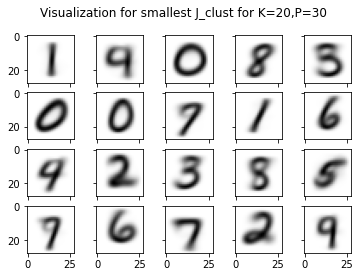

In [ ]:
fig, axs = plt.subplots(4, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20) = axs
fig.suptitle('Visualization for smallest J_clust for K=20,P=30')
ax1.imshow(min_label[0,:].reshape(28,28),cmap='binary')
ax2.imshow(min_label[1,:].reshape(28,28),cmap='binary')
ax3.imshow(min_label[2,:].reshape(28,28),cmap='binary')
ax4.imshow(min_label[3,:].reshape(28,28),cmap='binary')
ax5.imshow(min_label[4,:].reshape(28,28),cmap='binary')
ax6.imshow(min_label[5,:].reshape(28,28),cmap='binary')
ax7.imshow(min_label[6,:].reshape(28,28),cmap='binary')
ax8.imshow(min_label[7,:].reshape(28,28),cmap='binary')
ax9.imshow(min_label[8,:].reshape(28,28),cmap='binary')
ax10.imshow(min_label[9,:].reshape(28,28),cmap='binary')
ax11.imshow(min_label[10,:].reshape(28,28),cmap='binary')
ax12.imshow(min_label[11,:].reshape(28,28),cmap='binary')
ax13.imshow(min_label[12,:].reshape(28,28),cmap='binary')
ax14.imshow(min_label[13,:].reshape(28,28),cmap='binary')
ax15.imshow(min_label[14,:].reshape(28,28),cmap='binary')
ax16.imshow(min_label[15,:].reshape(28,28),cmap='binary')
ax17.imshow(min_label[16,:].reshape(28,28),cmap='binary')
ax18.imshow(min_label[17,:].reshape(28,28),cmap='binary')
ax19.imshow(min_label[18,:].reshape(28,28),cmap='binary')
ax20.imshow(min_label[19,:].reshape(28,28),cmap='binary')


for ax in axs.flat:
    ax.label_outer()

The representitives should be digits that represent all digits in that class. For minimum J_clust, they represents digits 1, 4, 0, 8, 3, 0, 0, 7, 1, 6, 4, 2, 3, 8, 5, 7, 6, 7, 2, 9. 

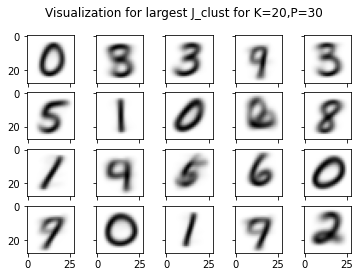

In [ ]:
fig, axs = plt.subplots(4, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20) = axs
fig.suptitle('Visualization for largest J_clust for K=20,P=30')
ax1.imshow(max_label[0,:].reshape(28,28),cmap='binary')
ax2.imshow(max_label[1,:].reshape(28,28),cmap='binary')
ax3.imshow(max_label[2,:].reshape(28,28),cmap='binary')
ax4.imshow(max_label[3,:].reshape(28,28),cmap='binary')
ax5.imshow(max_label[4,:].reshape(28,28),cmap='binary')
ax6.imshow(max_label[5,:].reshape(28,28),cmap='binary')
ax7.imshow(max_label[6,:].reshape(28,28),cmap='binary')
ax8.imshow(max_label[7,:].reshape(28,28),cmap='binary')
ax9.imshow(max_label[8,:].reshape(28,28),cmap='binary')
ax10.imshow(max_label[9,:].reshape(28,28),cmap='binary')
ax11.imshow(max_label[10,:].reshape(28,28),cmap='binary')
ax12.imshow(max_label[11,:].reshape(28,28),cmap='binary')
ax13.imshow(max_label[12,:].reshape(28,28),cmap='binary')
ax14.imshow(max_label[13,:].reshape(28,28),cmap='binary')
ax15.imshow(max_label[14,:].reshape(28,28),cmap='binary')
ax16.imshow(max_label[15,:].reshape(28,28),cmap='binary')
ax17.imshow(max_label[16,:].reshape(28,28),cmap='binary')
ax18.imshow(max_label[17,:].reshape(28,28),cmap='binary')
ax19.imshow(max_label[18,:].reshape(28,28),cmap='binary')
ax20.imshow(max_label[19,:].reshape(28,28),cmap='binary')


for ax in axs.flat:
    ax.label_outer()

For maximum J_clust, they represents digits 0, 3, 3, 9, 3, 5, 1, 0, 6, 8, 1, 9, 5, 6, 0, 7, 0, 1, 7, 2. Representitives for minimum J_clust shows clearer identification of digits than Representitives for maximum J_clust. Some of the representitives in maximum J_clust. such as class 9 in 2nd row 4th column, shows very blury image which are hard to identified which digit it represents, while representitives in minimum J_clust are earsier to identified as digits.

## 3.3 Identification of Classified/Misclassified

In [ ]:
def find_10smallest(data,cluster,label,num):
    
    # get the 10 nearest data points to representitive of class num.
    data_atnum = data[np.where(cluster == num)]
    dists = np.linalg.norm(data_atnum-label[num], axis = 1)
    smallest_i = np.argpartition(dists,10)[:10]
    smallest_data = data_atnum[smallest_i]
    return smallest_data

In [ ]:
def draw_10smallest(data,cluster,label,num):
    
    # plot the 10 nearest digits from class num.
    smallest10_data = find_10smallest(data,cluster,label,num)
    fig, axs = plt.subplots(2, 5)
    (ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
    fig.suptitle('Visualization for smallest 10 for class %d' % num)
    ax1.imshow(smallest10_data[0,:].reshape(28,28),cmap='binary')
    ax2.imshow(smallest10_data[1,:].reshape(28,28),cmap='binary')
    ax3.imshow(smallest10_data[2,:].reshape(28,28),cmap='binary')
    ax4.imshow(smallest10_data[3,:].reshape(28,28),cmap='binary')
    ax5.imshow(smallest10_data[4,:].reshape(28,28),cmap='binary')
    ax6.imshow(smallest10_data[5,:].reshape(28,28),cmap='binary')
    ax7.imshow(smallest10_data[6,:].reshape(28,28),cmap='binary')
    ax8.imshow(smallest10_data[7,:].reshape(28,28),cmap='binary')
    ax9.imshow(smallest10_data[8,:].reshape(28,28),cmap='binary')
    ax10.imshow(smallest10_data[9,:].reshape(28,28),cmap='binary')

    for ax in axs.flat:
        ax.label_outer()

### 3.3.1 Identification for minimum J_clust

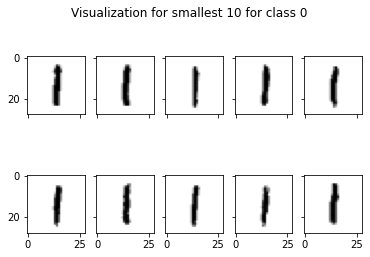

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,0)

We can see from the session above that class 0 represents number 1.  
Digits: 1,1,1,1,1,1,1,1,1,1  
Number of classified: 10  
Number of misclassified: 0

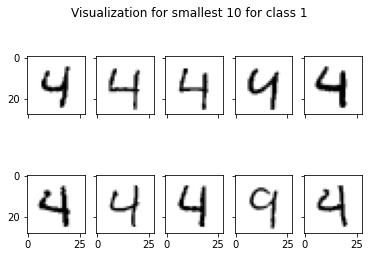

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,1)

We can see that class 1 represents number 4.  
Digits: 4,4,4,4,4,4,4,4,9,4  
Number of classified: 9  
Number of misclassified: 1

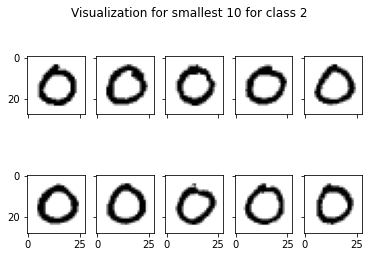

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,2)

We can see that class 2 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

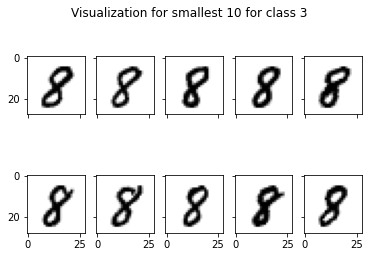

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,3)

We can see that class 3 represents number 8.  
Digits: 8,8,8,8,8,8,8,8,8,8  
Number of classified: 10  
Number of misclassified: 0

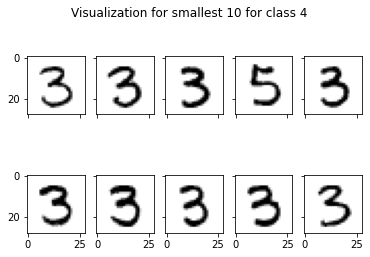

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,4)

We can see that class 4 represents number 3.  
Digits: 3,3,3,5,3,3,3,3,3,3  
Number of classified: 9  
Number of misclassified: 1

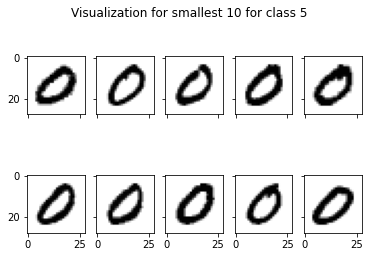

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,5)

We can see that class 5 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

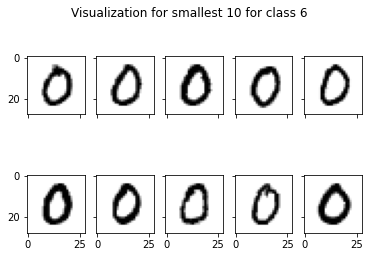

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,6)

We can see that class 6 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

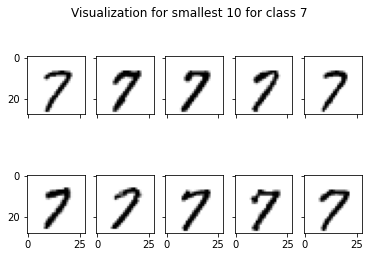

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,7)

We can see that class 7 represents number 7.  
Digits: 7,7,7,7,7,7,7,7,7,7  
Number of classified: 10  
Number of misclassified: 0

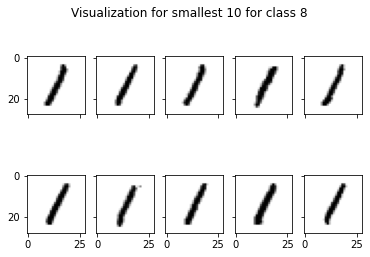

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,8)

We can see that class 8 represents number 1.  
Digits: 1,1,1,1,1,1,1,1,1,1  
Number of classified: 10  
Number of misclassified: 0

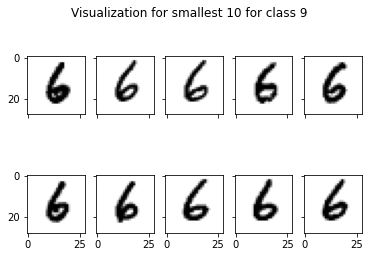

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,9)

We can see that class 9 represents number 6.  
Digits: 6,6,6,6,6,6,6,6,6,6  
Number of classified: 10  
Number of misclassified: 0

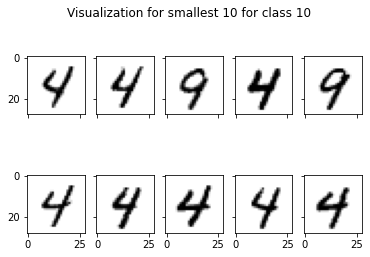

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,10)

We can see that class 10 represents number 4.  
Digits: 4,4,9,4,9,4,4,4,4,4  
Number of classified: 8  
Number of misclassified: 2

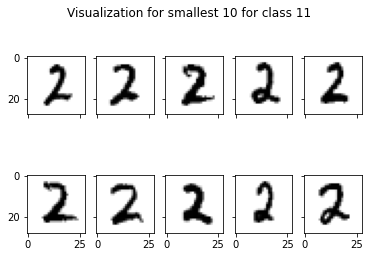

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,11)

We can see that class 11 represents number 2.  
Digits: 2,2,2,2,2,2,2,2,2,2  
Number of classified: 10  
Number of misclassified: 0

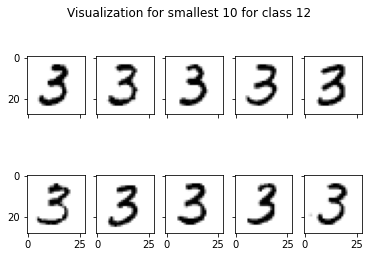

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,12)

We can see that class 12 represents number 3.  
Digits: 3,3,3,3,3,3,3,3,3,3  
Number of classified: 10  
Number of misclassified: 0

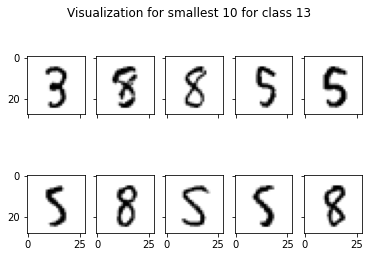

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,13)

We can see that class 13 represents number 8.  
Digits: 3,8,8,5,5,5,8,5,5,8  
Number of classified: 4  
Number of misclassified: 6

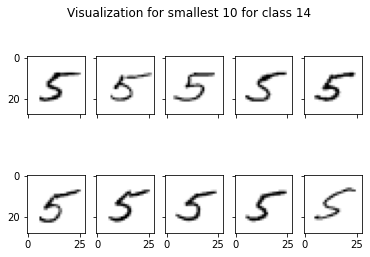

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,14)

We can see that class 14 represents number 5.  
Digits: 5,5,5,5,5,5,5,5,5,5  
Number of classified: 10  
Number of misclassified: 0

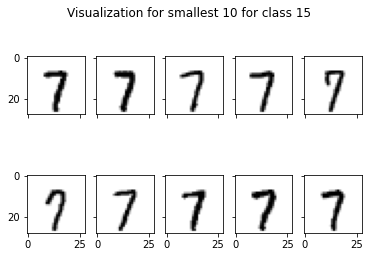

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,15)

We can see that class 15 represents number 7.  
Digits: 7,7,7,7,7,7,7,7,7,7  
Number of classified: 10  
Number of misclassified: 0

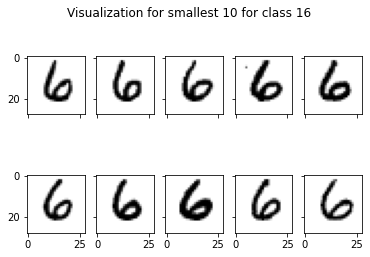

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,16)

We can see that class 16 represents number 6.  
Digits: 6,6,6,6,6,6,6,6,6,6  
Number of classified: 10  
Number of misclassified: 0

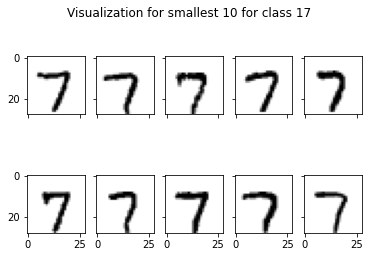

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,17)

We can see that class 17 represents number 7.  
Digits: 7,7,7,7,7,7,7,7,7,7  
Number of classified: 10  
Number of misclassified: 0

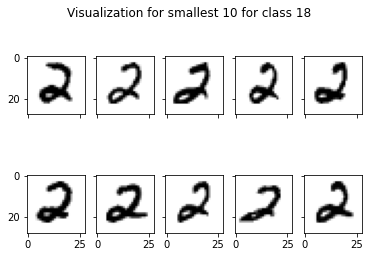

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,18)

We can see that class 18 represents number 2.  
Digits: 2,2,2,2,2,2,2,2,2,2  
Number of classified: 10  
Number of misclassified: 0

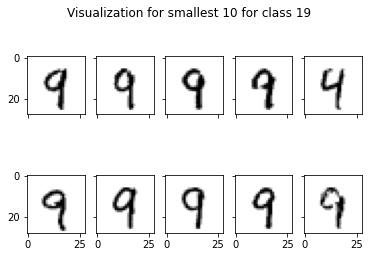

In [ ]:
draw_10smallest(data_train,min_cluster,min_label,19)

We can see that class 19 represents number 9.  
Digits: 9,9,9,9,4,9,9,9,9,9  
Number of classified: 9  
Number of misclassified: 1

### 3.3.2 Identification for maximum J_clust

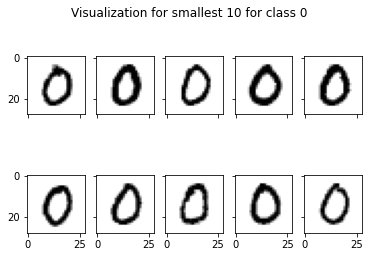

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,0)

We can see that class 0 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

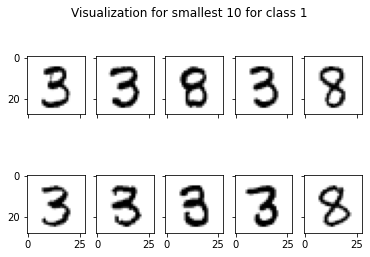

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,1)

We can see that class 1 represents number 3.  
Digits: 3,3,8,3,8,3,3,3,3,8  
Number of classified: 7  
Number of misclassified: 3

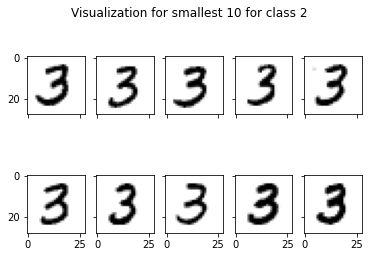

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,2)

We can see that class 2 represents number 3.  
Digits: 3,3,3,3,3,3,3,3,3,3  
Number of classified: 10  
Number of misclassified: 0

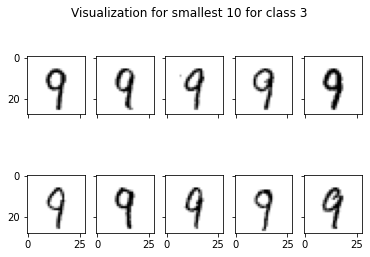

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,3)

We can see that class 3 represents number 9.  
Digits: 9,9,9,9,9,9,9,9,9,9  
Number of classified: 10  
Number of misclassified: 0

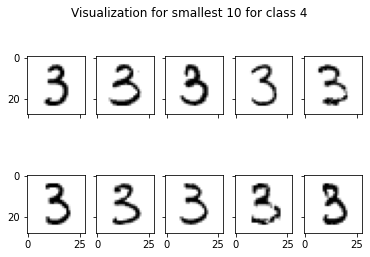

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,4)

We can see that class 4 represents number 3.  
Digits: 3,3,3,3,3,3,3,3,3,3  
Number of classified: 10  
Number of misclassified: 0

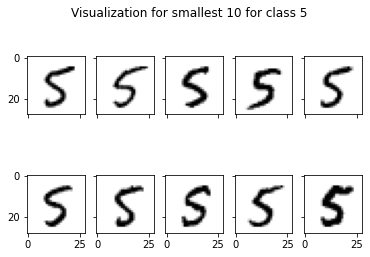

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,5)

We can see that class 5 represents number 5.  
Digits: 5,5,5,5,5,5,5,5,5  
Number of classified: 10  
Number of misclassified: 0

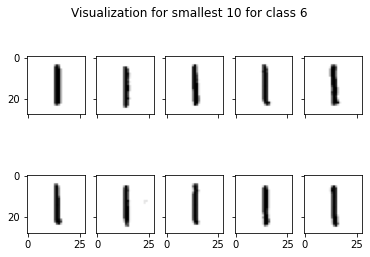

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,6)

We can see that class 6 represents number 1.  
Digits: 1,1,1,1,1,1,1,1,1,1  
Number of classified: 10  
Number of misclassified: 0

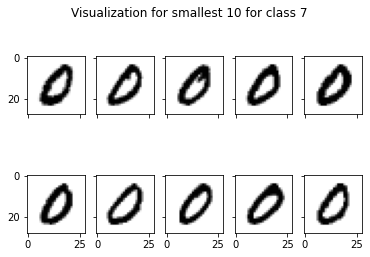

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,7)

We can see that class 7 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

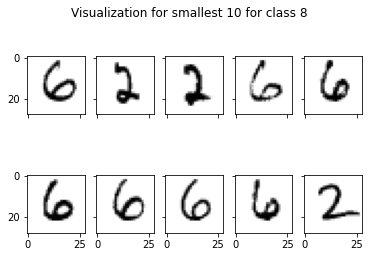

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,8)

We can see that class 8 represents number 6.  
Digits: 6,2,2,6,6,6,6,6,6,2  
Number of classified: 7  
Number of misclassified: 3

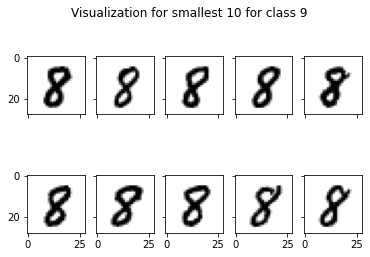

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,9)

We can see that class 9 represents number 8.  
Digits: 8,8,8,8,8,8,8,8,8,8  
Number of classified: 10  
Number of misclassified: 0

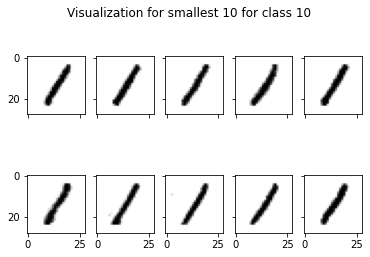

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,10)

We can see that class 10 represents number 1.  
Digits: 1,1,1,1,1,1,1,1,1,1  
Number of classified: 10  
Number of misclassified: 0

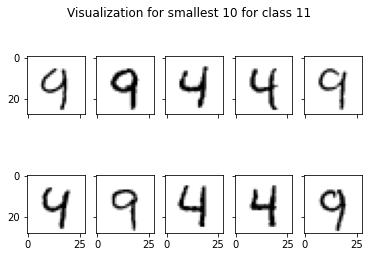

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,11)

We can see that class 11 represents number 9.  
Digits: 9,9,4,4,9,4,9,4,4,9  
Number of classified: 5  
Number of misclassified: 5

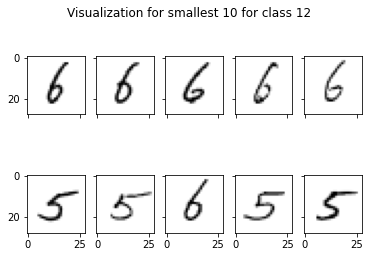

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,12)

We can see that class 12 represents number 5.  
Digits: 6,6,6,6,6,5,5,6,5,5  
Number of classified: 4  
Number of misclassified: 6

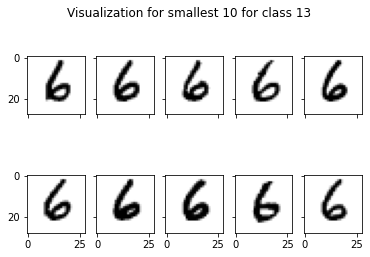

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,13)

We can see that class 13 represents number 6.  
Digits: 6,6,6,6,6,6,6,6,6,6  
Number of classified: 10  
Number of misclassified: 0

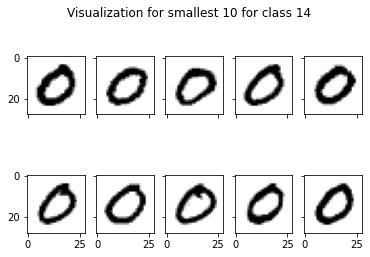

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,14)

We can see that class 14 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

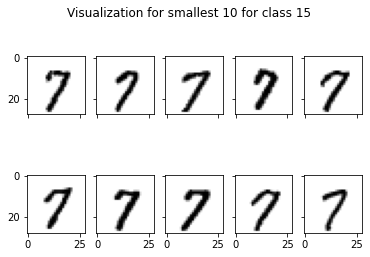

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,15)

We can see that class 15 represents number 7.  
Digits: 7,7,7,7,7,7,7,7,7,7
Number of classified: 10  
Number of misclassified: 0

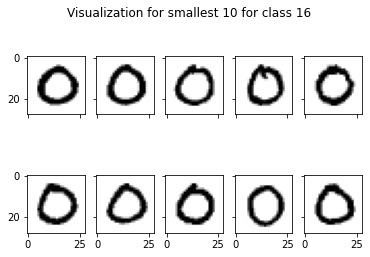

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,16)

We can see that class 16 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

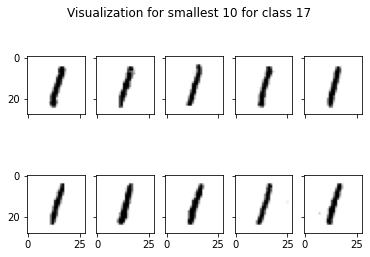

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,17)

We can see that class 17 represents number 1.  
Digits: 1,1,1,1,1,1,1,1,1,1  
Number of classified: 10  
Number of misclassified: 0

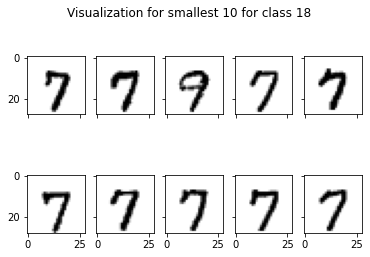

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,18)

We can see that class 18 represents number 7.  
Digits: 7,7,9,7,7,7,7,7,7,7  
Number of classified: 9  
Number of misclassified: 1

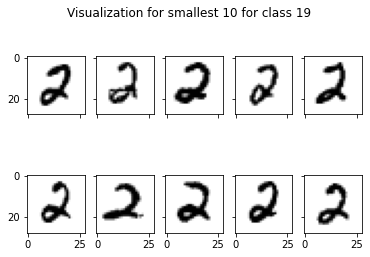

In [ ]:
draw_10smallest(data_train,max_cluster,max_label,19)

We can see that class 19 represents number 2.  
Digits: 2,2,2,2,2,2,2,2,2,2  
Number of classified: 10  
Number of misclassified: 0

### 3.3.3 Tables of classified/misclassified

Following is the table for minimum J_clust.

In [ ]:
min_identify = {'Classified': [10,9,10,10,9,10,10,10,10,10,8,10,10,4,10,10,10,10,10,9],
        'Misclassified': [0,1,0,0,1,0,0,0,0,0,2,0,0,6,0,0,0,0,0,1] }
table_min = pd.DataFrame(min_identify, columns = ['Classified', 'Misclassified'])
table_min

,Classified,Misclassified
0,10,0
1,9,1
2,10,0
3,10,0
4,9,1
5,10,0
6,10,0
7,10,0
8,10,0
9,10,0


Following is the table for maximum J_clust.

In [ ]:
min_identify = {'Classified': [10,7,10,10,10,10,10,10,7,10,10,5,4,10,10,10,10,10,9,10],
        'Misclassified': [0,3,0,0,0,0,0,0,3,0,0,5,6,0,0,0,0,0,1,0] }
table_min = pd.DataFrame(min_identify, columns = ['Classified', 'Misclassified'])
table_min

,Classified,Misclassified
0,10,0
1,7,3
2,10,0
3,10,0
4,10,0
5,10,0
6,10,0
7,10,0
8,7,3
9,10,0


Observation shows that maximum J_clust has a greater number of misclassified than minimum J_clust. As J_clust represents distance from each data to the representitives, smaller J_clust means better classification of each digit, which is consistent with the observation.

### 4.3.4 Example visualization of misclassifed and classified in some class

#### Minimum J_clust

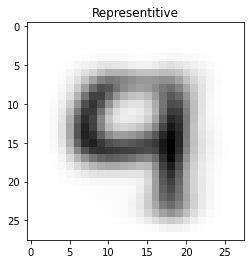

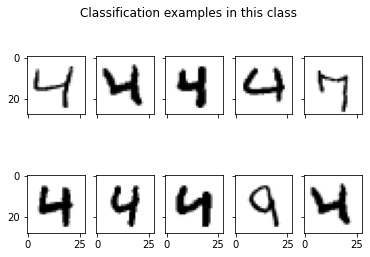

In [ ]:
plt.subplot()
plt.imshow(min_label[1,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(min_cluster == 1)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()

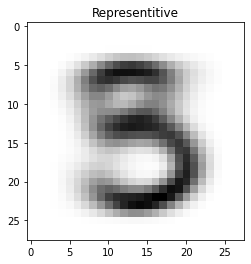

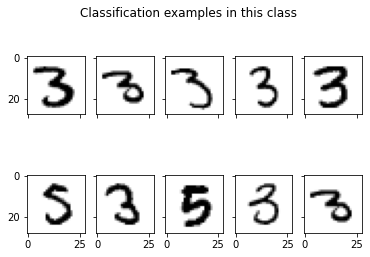

In [ ]:
plt.subplot()
plt.imshow(min_label[4,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(min_cluster == 4)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()

#### Maximum J_clust

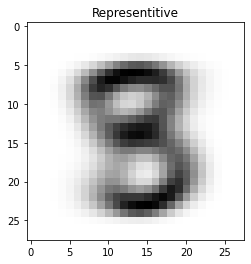

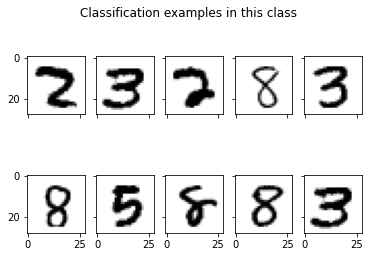

In [ ]:
plt.subplot()
plt.imshow(max_label[1,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(max_cluster == 1)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()

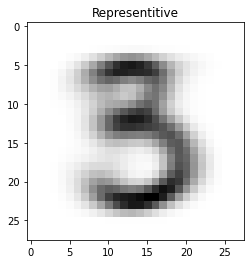

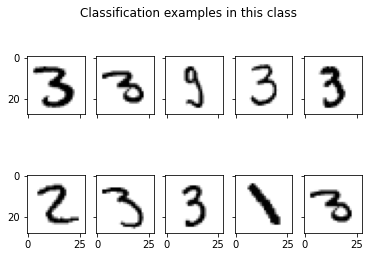

In [ ]:
plt.subplot()
plt.imshow(max_label[4,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(max_cluster == 4)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()